Group 4:
Kritika Dmonty, Avina Patel, Daniel Zehirov

Logistic regression and some data visualization notebook

In [2]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.api as st
plt.rc("font", size=14)
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn.metrics import classification_report
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

In [3]:
import pandas as pd

data = pd.read_excel (r'/Users/avinaapatel/Desktop/Diabetes/encodedDiabetes2.xlsx')
data = data.dropna()
print(data.shape)
print(list(data.columns))

(99492, 25)
['race_cauc', 'race_afr', 'race_asian', 'race_hispanic', 'race_other', 'gender', 'age_enc', 'admission_type_id', 'time_in_hospital', 'num_lab_procedures', 'num_procedures', 'num_medications', 'number_inpatient', 'number_diagnoses', 'metformin_down', 'metformin_no', 'metformin_steady', 'metformin_up', 'insulin_no', 'insulin_steady', 'insulin_up', 'insulin_down', 'change_enc', 'diabetesMed_enc', 'readmitted_enc']


In [13]:
data.head()

,race_cauc,race_afr,race_asian,race_hispanic,race_other,gender,age_enc,admission_type_id,time_in_hospital,num_lab_procedures,...,metformin_no,metformin_steady,metformin_up,insulin_no,insulin_steady,insulin_up,insulin_down,change_enc,diabetesMed_enc,readmitted_enc
0,1,0,0,0,0,0,0,6,1,41,...,1,0,0,1,0,0,0,0,0,0
1,1,0,0,0,0,0,0,1,3,59,...,1,0,0,0,0,1,0,1,1,2
2,0,1,0,0,0,0,0,1,2,11,...,1,0,0,1,0,0,0,0,1,0
3,1,0,0,0,0,1,1,1,2,44,...,1,0,0,0,0,1,0,1,1,0
4,1,0,0,0,0,1,1,1,1,51,...,1,0,0,0,1,0,0,1,1,0


The data was cleaned and then dummy variables are made for race, gender, age, metformin, and insulin.

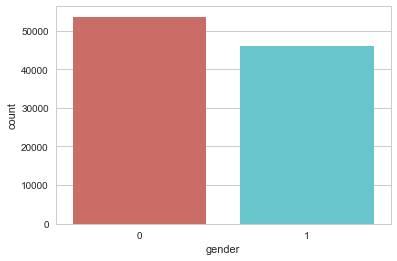

<Figure size 432x288 with 0 Axes>

In [6]:
sns.countplot(x='gender',data=data, palette='hls')
plt.show()
plt.savefig('count_plot')

It is observed by this graph that there are more women than men in this study. Women account for the 0 binary, while men are 1.

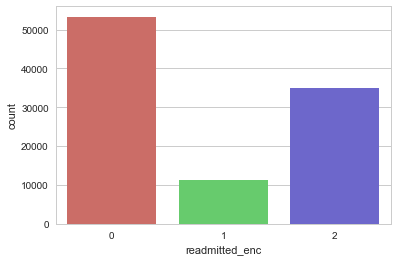

<Figure size 432x288 with 0 Axes>

In [7]:
sns.countplot(x='readmitted_enc',data=data, palette='hls')
plt.show()
plt.savefig('count_plot2')

In [22]:
data['readmitted_enc'].value_counts()
#0 = no readmission
#1 = <30 readmission
#2 = >30 readmission

0    53316
2    35007
1    11169
Name: readmitted_enc, dtype: int64

In [27]:
data['race_cauc'].value_counts()

1    76099
0    23393
Name: race_cauc, dtype: int64

In [24]:
data['race_afr'].value_counts()

0    80282
1    19210
Name: race_afr, dtype: int64

In [25]:
data['race_asian'].value_counts()

0    98851
1      641
Name: race_asian, dtype: int64

In [26]:
data['race_hispanic'].value_counts()

0    97455
1     2037
Name: race_hispanic, dtype: int64

In [28]:
data['race_other'].value_counts()

0    97987
1     1505
Name: race_other, dtype: int64

We can see here that Caucasian makes up most of the entries, followed by African American, Hispanic, other, and then Asian.

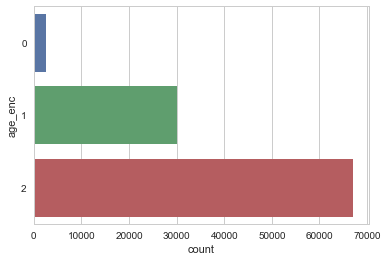

In [30]:
sns.countplot(y="age_enc", data=data)
plt.show()

For ages 0-30 it's encoded as 0, 30-60 is 1, and 60-100 is 2. The data is made up of mostly the elderly.

In [31]:
data['metformin_up'].value_counts()

0    98453
1     1039
Name: metformin_up, dtype: int64

In [32]:
data['metformin_down'].value_counts()

0    98930
1      562
Name: metformin_down, dtype: int64

In [33]:
data['metformin_steady'].value_counts()

0    81572
1    17920
Name: metformin_steady, dtype: int64

In [34]:
data['metformin_no'].value_counts()

1    79971
0    19521
Name: metformin_no, dtype: int64

In [37]:
data['insulin_no'].value_counts()

0    52997
1    46495
Name: insulin_no, dtype: int64

In [38]:
data['insulin_steady'].value_counts()

0    69590
1    29902
Name: insulin_steady, dtype: int64

In [39]:
data['insulin_up'].value_counts()

0    88436
1    11056
Name: insulin_up, dtype: int64

In [40]:
data['insulin_down'].value_counts()

0    87453
1    12039
Name: insulin_down, dtype: int64

In [11]:
X = data[['race_cauc', 'race_afr', 'race_asian', 'race_hispanic', 'race_other', 'gender', 'age_enc', 'admission_type_id', 'time_in_hospital', 'num_lab_procedures', 'num_procedures', 'num_medications', 'number_inpatient', 'number_diagnoses', 'metformin_down', 'metformin_no', 'metformin_steady', 'metformin_up', 'insulin_no', 'insulin_steady', 'insulin_up', 'insulin_down', 'change_enc', 'diabetesMed_enc']]
y = data['readmitted_enc']

In [12]:
X_train, X_test, y_train, y_test = train_test_split(data, y, test_size=0.2)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(79593, 25) (79593,)
(19899, 25) (19899,)


In [13]:
LogReg = LogisticRegression(random_state=0, multi_class='multinomial', solver='newton-cg')
logFit = LogReg.fit(X_train, y_train)
logFit

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='multinomial',
          n_jobs=1, penalty='l2', random_state=0, solver='newton-cg',
          tol=0.0001, verbose=0, warm_start=False)

In [14]:
logFit.intercept_

array([ 12.59724533,   3.8724765 , -16.46972183])

In [87]:
logFit.coef_

array([[-2.29340249e-02, -1.93622521e-02,  8.99146422e-03,
         1.39355956e-02,  1.94598483e-02,  1.44340286e-02,
        -3.12928256e-02, -5.25544843e-03, -5.43467969e-03,
        -3.98017705e-04,  1.72651443e-02, -6.52231553e-04,
        -1.29164686e-01, -2.89575695e-02, -1.09399409e-02,
        -2.79250342e-02,  1.36477906e-02,  2.53078158e-02,
         3.07587565e-03,  3.21419880e-02, -9.11408924e-03,
        -2.60131431e-02, -1.12342361e-02, -9.22121161e-02,
        -1.42228697e+01],
       [ 2.57557855e-03,  1.01788621e-02,  7.97880279e-03,
        -4.91842905e-03, -1.58278236e-02,  1.27427525e-03,
         4.57657462e-02, -3.57924070e-03,  8.96339470e-03,
        -7.31340190e-05, -6.84830981e-03,  1.46882640e-03,
         9.93314455e-02,  1.22120388e-02,  3.10716917e-02,
         1.81078325e-02, -1.24585970e-02, -3.67339365e-02,
        -2.06820555e-02, -1.77162315e-02,  1.14005590e-02,
         2.69847188e-02, -8.42943127e-03,  4.97709409e-02,
         1.00047651e-01],
    

These coefficients show the multinomial logit estimate for a one unit increase in each independent variable for the chances of readmission given the other variables in the model are held constant. For example, the multinomial logit for being of Asian descent relative to other races is 0.00899146422 units higher for no readmission as opposed to being readmitted to the hospital for diabetes given all other predictor variables in the model are held constant.

As another interpretation, the multinomial logit of males as opposed to females for readmission over 30 days decreases by 0.0157083038, so being a female increases your chances of being readmitted in over 30 days.

This shows us that Caucasian women who are on medication for diabetes have the higest risk of readmission for both over and under 30 day target variables. The least likely group to be readmitted is Asian males.

In [15]:
y_pred = LogReg.predict(X_test)

In [16]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
confusion_matrix

array([[10666,     0,     0],
       [    0,  2209,     0],
       [    0,     0,  7024]])

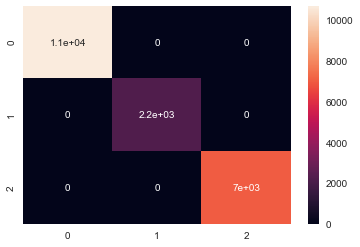

In [17]:
ax = plt.subplot()
s=sns.heatmap(confusion_matrix, annot=True, ax = ax);

In [18]:
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels');
ax.set_title('Confusion Matrix');
plt.show()

In [19]:
print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

          0       1.00      1.00      1.00     10666
          1       1.00      1.00      1.00      2209
          2       1.00      1.00      1.00      7024

avg / total       1.00      1.00      1.00     19899



The multinomial logistic regression is 100% accurate.